# TAL Labo 1c : mêmes opérations sur une page web en anglais

**Objectif** 

Dans cette troisième partie du Labo1, vous allez refaire une partie des traitements de la partie 1b, mais cette fois-ci sur une page web, spécifiquement une page Wikipedia en anglais (suggestion : "Switzerland").  L'objectif est de réviser les principales commandes apprises, et de traiter le format HTML.

In [33]:
import nltk
import os
from urllib import request
import matplotlib.pyplot 
%matplotlib inline

S'inspirer du [chapitre 3 du livre NLTK](http://www.nltk.org/book/ch03.html) pour faire une requête et récupérer le contenu de la page indiquée dans `url2`.  Quelle est la longueur de la chaîne de caractères obtenue ?

In [34]:
url2 = "https://en.wikipedia.org/wiki/Switzerland" 
response= request.urlopen(url2)
html2= response.read().decode('utf8')

len(html2)

748680

Nous utilserons l'outil `BeautifulSoup` disponible sous forme de module Python pour extraire tout le texte de la page HTML.  Si le contenu de la page est stocké dans `html2`, nous extrayons le texte dans `raw2`.

In [35]:
from bs4 import BeautifulSoup

In [36]:
# ajouté pour récuperer l'article stocke dans un .txt pour dans le train 
wikiSwiss = "wikiSwitzerland.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_2.txt

fd = open(wikiSwiss, 'r', encoding='utf8')
# Please write your Python code below and execute it.

raw2=fd.read()

fd.close()
print (raw2)

Hornussen swissroots.org. Retrieved on 25 January 2010

^ Tradition and history interlaken.ch. Retrieved on 25 January 2010

^ Zürcher Geschnetzeltes Zürcher Geschnetzeltes, engl.: sliced meat Zürich style

^ Flavors of Switzerland Archived 20 July 2009 at the Wayback Machine theworldwidegourmet.com. Retrieved on 24 June 2009

^ Michelin Guide Switzerland 2010 attests to the high quality of gourmet cooking with one new 2 star restaurant and 8 new one star Archived 27 April 2011 at the Wayback Machine Press information, Michelin. Retrieved on 14 December 2009

^ Swiss region serves up food with star power Archived 18 September 2012 at the Wayback Machine usatoday.com. Retrieved on 14 December 2009

^ Chocolate Archived 3 September 2009 at the Wayback Machine swissworld.org. Retrieved on 24 June 2009

^ Swiss Chocolate germanworldonline.com (4 December 2009). Retrieved on 14 June 2010

^ Wine-producing Switzerland in short Archived 9 April 2009 at the Wayback Machine swisswine.ch. Retrie

In [37]:
raw2 = BeautifulSoup(html2).get_text()
print(raw2)


.

^ Hornussen swissroots.org. Retrieved on 25 January 2010

^ Tradition and history interlaken.ch. Retrieved on 25 January 2010

^ Zürcher Geschnetzeltes Zürcher Geschnetzeltes, engl.: sliced meat Zürich style

^ Flavors of Switzerland Archived 20 July 2009 at the Wayback Machine theworldwidegourmet.com. Retrieved on 24 June 2009

^ Michelin Guide Switzerland 2010 attests to the high quality of gourmet cooking with one new 2 star restaurant and 8 new one star Archived 27 April 2011 at the Wayback Machine Press information, Michelin. Retrieved on 14 December 2009

^ Swiss region serves up food with star power Archived 18 September 2012 at the Wayback Machine usatoday.com. Retrieved on 14 December 2009

^ Chocolate Archived 3 September 2009 at the Wayback Machine swissworld.org. Retrieved on 24 June 2009

^ Swiss Chocolate germanworldonline.com (4 December 2009). Retrieved on 14 June 2010

^ Wine-producing Switzerland in short Archived 9 April 2009 at the Wayback Machine swisswine.ch. R

Réutilisez la méthode de la partie 1b pour enlever le début et la fin de la chaîne `raw2`, car ils contiennent du texte qui n'est pas pertinent pour notre analyse ("ne parle pas de la Suisse").  Quelle est la longueur du résultat ? Afficher aussi ses 100 premiers et 100 derniers caractères (p.ex. `raw2trimmed`).

In [38]:
# Please write your Python code below and execute it.
startOfArticle= raw2.find("From Wikipedia, the free encyclopedia")+len("From Wikipedia, the free encyclopedia")
cut=raw2[startOfArticle:]
endOfArticle= cut.rfind("Notes and reference")
raw2trimmed= cut[:endOfArticle]
print(raw2trimmed[0:100])
print(raw2trimmed[-100:])




Jump to navigation
Jump to search
This article is about the sovereign state. For other uses, see 
elated articles
Outline of Switzerland
List of sovereign states and dependent territories in Europe



Effectuer la segmentation en phrases, puis tokeniser chaque phrase.  Ecrivez le résultat (une phrase par ligne, espaces entre *tokens*) dans un fichier `sample_web_page.txt` et inspectez-le avec un éditeur de texte.  Observez-vous des imperfections ?

In [39]:
sentenceTokenized=nltk.sent_tokenize(raw2trimmed,language='english')


wordSentenceTokenized=[]
for sentence in sentenceTokenized:
    wordSentenceTokenized.append(nltk.word_tokenize(sentence))

print(wordSentenceTokenized[50:53])

[['Sometime', 'around', 'the', 'start', 'of', 'the', 'Common', 'Era', ',', 'the', 'Romans', 'maintained', 'a', 'large', 'legionary', 'camp', 'called', 'Vindonissa', ',', 'now', 'a', 'ruin', 'at', 'the', 'confluence', 'of', 'the', 'Aare', 'and', 'Reuss', 'rivers', ',', 'near', 'the', 'town', 'of', 'Windisch', ',', 'an', 'outskirt', 'of', 'Brugg', '.'], ['The', 'first', 'and', 'second', 'century', 'AD', 'was', 'an', 'age', 'of', 'prosperity', 'for', 'the', 'population', 'living', 'on', 'the', 'Swiss', 'plateau', '.'], ['Several', 'towns', ',', 'like', 'Aventicum', ',', 'Iulia', 'Equestris', 'and', 'Augusta', 'Raurica', ',', 'reached', 'a', 'remarkable', 'size', ',', 'while', 'hundreds', 'of', 'agricultural', 'estates', '(', 'Villae', 'rusticae', ')', 'were', 'founded', 'in', 'the', 'countryside', '.']]


Enormément de "tags" numériques que l'on pourrait filtrer

In [40]:
filename = "sample_web_page3.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_web_page.txt
if os.path.exists(filename): 
    os.remove(filename)
fd = open(filename, 'a', encoding='utf8')
# Please write your Python code below and execute it.
for sentence in wordSentenceTokenized:
    for word in sentence:
        fd.write(word+" ")
    fd.write("\n")
fd.close()

Effectuer maintenant la tokenisation de cette page **sans** faire de segmentation en phrases.  Stockez le résultat dans une variable (p.ex. `words2`) sans écrire de fichier.  Combien de tokens possède ce texte ?

In [41]:
# Please write your Python code below and execute it.
words2 = nltk.word_tokenize(raw2trimmed)
len(words2)

18615

Créez un objet de type nltk.Text à partir de la liste de *tokens* `words2`.  Appliquez-lui à titre d'exemple les méthodes `concordance`, `similar` et `collocations`. 

In [42]:
# Please write your Python code below and execute it.
text = nltk.Text(words2)
print(text)


<Text: Jump to navigation Jump to search This article...>


In [43]:
text.concordance("confederation")

Displaying 20 of 20 matches:
 Europe '' Swiss '' and `` Swiss Confederation '' redirect here . For other use
iss ( disambiguation ) and Swiss Confederation ( disambiguation ) . Swiss Confe
ation ( disambiguation ) . Swiss Confederation 5 other official names Schweizer
itzerland , officially the Swiss Confederation , is a country situated in the c
o Helvetica ( English : Helvetic Confederation ) . The toponym Schwyz itself wa
y came to be used for the entire Confederation . [ 22 ] [ 23 ] The Swiss German
nite article ( d'Schwiiz for the Confederation , [ 24 ] but simply Schwyz for t
ntury ( 1291 ) , forming a loose confederation of states which persisted for ce
creased power and wealth for the confederation . [ 33 ] By 1460 , the confedera
lier wars , but expansion of the confederation suffered a setback in 1515 with 
 Swiss autonomy and introduced a Confederation of 19 cantons . [ 33 ] Hencefort
, divides the powers between the Confederation and the cantons and defines fede
e Council .

In [44]:
text.similar("geneva")

switzerland is and of the in by valais december about central german
bern under august gdp ad cantons with germany


In [45]:
text.collocation_list(15)

['Main article',
 '.mw-parser-output .tmulti',
 'European Union',
 'United Nations',
 'St. Gallen',
 'Federal Council',
 'Main articles',
 'Federal Assembly',
 'direct democracy',
 'bilateral agreements',
 'per capita',
 'Helvetic Republic',
 'Swiss Confederacy',
 'Red Cross',
 '.mw-parser-output .portal']

Déterminez le vocabulaire de cette page (la liste des _types_) en convertissant la liste des _tokens_ en un `set`.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [46]:
# Please write your Python code below and execute it.
vocabulary= set(words2)
len(vocabulary)

4349

Construisez un objet FreqDist avec les mots de cette page, en convertissant en minuscules tous les mots contenant seulement des lettres (utilisez la méthode `.isalpha()` de Python).  Quels sont les 30 mots les plus fréquents ?

In [47]:
# Please write your Python code below and execute it.
lowerCase= []
for w in words2:
    if w.isalpha():
        lowerCase.append(w.lower())
    #else:
       ## lowerCase.append(w)


fdist= nltk.FreqDist(lowerCase)  
fdist.most_common(50)

[('the', 1280),
 ('of', 633),
 ('in', 490),
 ('and', 489),
 ('to', 237),
 ('switzerland', 221),
 ('a', 209),
 ('swiss', 188),
 ('is', 152),
 ('as', 113),
 ('are', 109),
 ('for', 102),
 ('federal', 100),
 ('was', 96),
 ('by', 95),
 ('with', 86),
 ('from', 84),
 ('world', 63),
 ('on', 62),
 ('has', 61),
 ('at', 61),
 ('it', 54),
 ('an', 52),
 ('one', 46),
 ('which', 45),
 ('or', 44),
 ('cantons', 44),
 ('its', 44),
 ('most', 44),
 ('country', 43),
 ('other', 41),
 ('also', 41),
 ('population', 39),
 ('european', 39),
 ('but', 39),
 ('international', 38),
 ('main', 35),
 ('that', 35),
 ('geneva', 34),
 ('not', 34),
 ('canton', 33),
 ('were', 33),
 ('german', 30),
 ('war', 30),
 ('largest', 29),
 ('have', 29),
 ('since', 28),
 ('this', 27),
 ('europe', 27),
 ('area', 27)]

Affichez le graphique cumulatif du nombre d'occurrences des 70 mots les plus fréquents de votre texte.

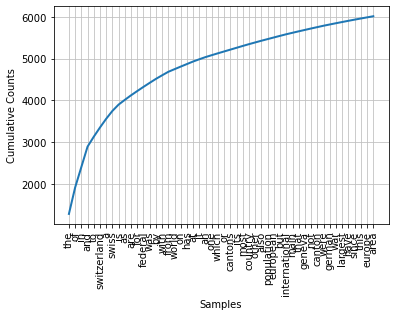

In [48]:
# Please write your Python code below and execute it.
fdist.plot(50,cumulative=True);

Construisez une liste avec la longueur de chaque token du texte, créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (non-cumulative) des nombres d'occurrences pour chaque longueur.  Qu'observez-vous ?

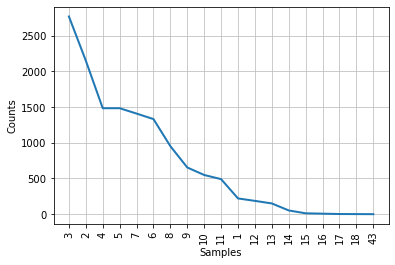

In [19]:
# Please write your Python code below and execute it.
wordLength= []
for w in lowerCase:
    wordLength.append(len(w))

lengthDist=nltk.FreqDist(wordLength)
lengthDist.plot(50,cumulative=False);



**Loi de Zipf.**  Générez la liste des fréquences des mots de votre texte par ordre décroissant (seulement les valeurs des fréquences).  Limitez cette liste à *N&nbsp;* valeurs (par exemple *N&nbsp;* = 100).  Affichez avec `matplotlib.pyplot.plot` la courbe en fonction du rang (donc le rang (1, 2, 3, ..., *N&nbsp;*) sur l'axe *x&nbsp;* et la fréquence sur l'axe *y&nbsp;*).  Ajoutez une courbe de la forme *y&nbsp;* = *a&nbsp;* / (*x&nbsp;* + *b&nbsp;*) en choississant des valeurs de *a&nbsp;* et *b&nbsp;* qui rapprochent autant que possible de la courbe des fréquences.

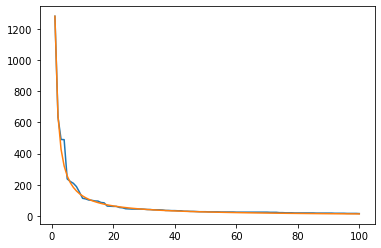

In [59]:
# Please write your Python code in this cell and execute it.
mostCommonWordFrequency= list(map(lambda f:f[1],fdist.most_common(100) ))
y= list(map(lambda x:mostCommonWordFrequency[0] /x,range(1,101)))
matplotlib.pyplot.plot(range(1,101),mostCommonWordFrequency,range(1,101),y);

## Fin de la partie 1c du Labo1
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1b et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 